In [2]:
# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
wine = pd.read_csv('winequality_edited.csv') 
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 1: Is a certain type of wine associated with higher quality?

In [3]:
wine.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

Seems that white wine has higher rating 5.88.

In [4]:
# Let's get the counts for each rating and color
color_counts = wine.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [5]:
color_totals = wine.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64


<AxesSubplot:xlabel='quality'>

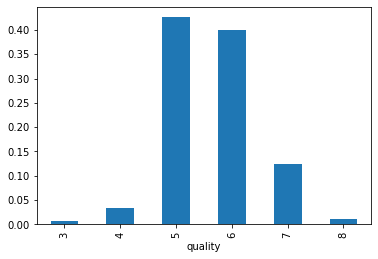

In [13]:
red_proportions = color_counts['red'] / color_totals['red']
print(red_proportions)
red_proportions.plot.bar()

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64


<AxesSubplot:xlabel='quality'>

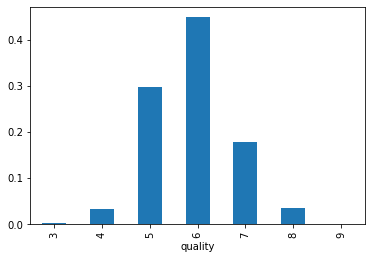

In [14]:
white_proportions = color_counts['white'] / color_totals['white']
print(white_proportions)
white_proportions.plot.bar()

### 2: What level of acidity receives the highest average rating?

In [63]:
wine.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [24]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low']
# Creates acidity_levels column
wine['acidity_levels'] = pd.cut(wine['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [26]:
# Find the mean quality of each acidity level with groupby
wine.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64


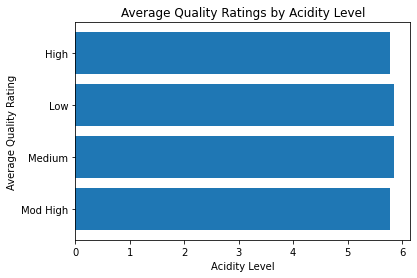

In [70]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = wine.groupby('acidity_levels').quality.mean()
print(acidity_level_quality_means)
# Create a bar chart with proper labels
locations = [4,1,2,3]
heights = acidity_level_quality_means
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title()
plt.barh(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

### 3: Do wines with higher alcoholic content receive better ratings?

In [28]:
# get the median amount of alcohol content
wine.alcohol.median()

10.3

In [30]:
# select samples with alcohol content less than the median
low_alcohol = wine.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol =wine.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

In [31]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

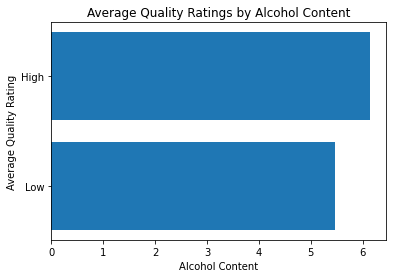

In [71]:
# Use query to select each group and get its mean quality
median = wine['alcohol'].median()

low = wine.query('alcohol < {}'.format(median))
high = wine.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.barh(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### 4: Do sweeter wines receive higher ratings?

In [33]:
# get the median amount of residual sugar
wine.residual_sugar.median()

3.0

In [34]:
# select samples with residual sugar less than the median
low_sugar = wine.query('residual_sugar < 3')

# select samples with residual sugar greater than or equal to the median
high_sugar = wine.query('residual_sugar >= 3')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count()

True

In [35]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

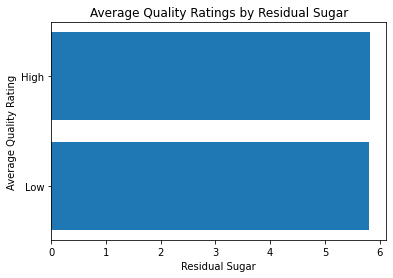

In [72]:
# Use query to select each group and get its mean quality
median = wine['residual_sugar'].median()
low = wine.query('residual_sugar < {}'.format(median))
high = wine.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.barh(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');